In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tbats import TBATS
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = pd.read_excel("..\\datasets\\modified_location_0.xlsx")

# Convert 'Date' to datetime format and set as index
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.dropna(subset=['Rainfall (in mm)'], inplace=True)
df = df[['Date', 'Rainfall (in mm)']]
df.set_index('Date', inplace=True)

# Extract the time series
rainfall_ts = df['Rainfall (in mm)']

In [16]:
# Split the data
train_start = '2018-01-01'
train_end = '2022-12-31'
test_start = '2023-01-01'
test_end = '2024-12-31'

y_train = rainfall_ts.loc[train_start:train_end]
y_test = rainfall_ts.loc[test_start:test_end]

In [17]:
# Fit TBATS model with detected seasonality (e.g., yearly = 365)
estimator = TBATS(seasonal_periods=[365])
tbats_model = estimator.fit(y_train)

In [18]:
# Forecast for the length of the test set
horizon = len(y_test)
forecast_tbats = tbats_model.forecast(steps=horizon)

In [19]:
# Evaluate the forecast
mae = mean_absolute_error(y_test, forecast_tbats)
mse = mean_squared_error(y_test, forecast_tbats)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, forecast_tbats)

In [20]:
print("TBATS Forecast Performance:")
print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

TBATS Forecast Performance:
MAE: 9.278
MSE: 315.720
RMSE: 17.769
R² Score: -0.364


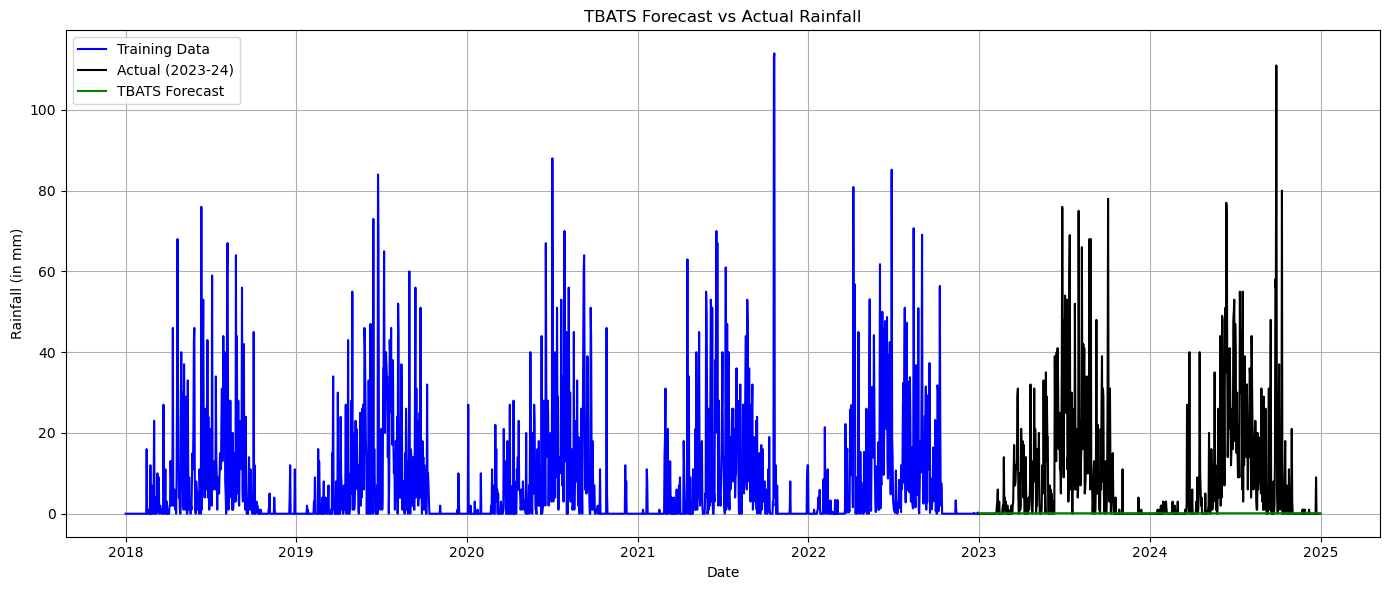

In [21]:
# Plot the forecast
plt.figure(figsize=(14, 6))
plt.plot(y_train.index, y_train, label="Training Data", color='blue')
plt.plot(y_test.index, y_test, label="Actual (2023-24)", color='black')
plt.plot(y_test.index, forecast_tbats, label="TBATS Forecast", color='green')
plt.title("TBATS Forecast vs Actual Rainfall")
plt.xlabel("Date")
plt.ylabel("Rainfall (in mm)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()